RESTARTFILE VISUALIZATION 1.0

In [1]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import ioeddy as io 
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import cmocean
import palettable
import time
import struct as st



fss = 12;
fsl = 15;

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})


plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)
plt.rc('axes', titlesize=fss)

plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])



In [3]:
filename='/home/sheel/Work/projects/spheroid_ar6_0aoa/codes/htd_coarse_res/u_00030000_r_ex.res'
i,j,k,it,time,dt,grav,data = io.readres(filename)

In [4]:
print('i,j,k=', i,j,k)
print('dtm=',dt)
print('grav=', grav)
print('time=', time)
print('size=',data.shape)
print('data=',data[1,2,5])
print('max_data=', np.nanmax(data))
print('min_data=', np.nanmin(data))
print('nstep=',it)

i,j,k= 368 258 770
dtm= 0.0002252233056975178
grav= 0.0
time= 8.788182163555541
size= (368, 258, 770)
data= 3.9933331468389634e-05
max_data= 1.0616640500469692
min_data= -0.8982451408578408
nstep= 30000


In [199]:
# Grid
nx, index, x, xe, xc = io.readgrid('./x3_grid.in')
nr, index, r, re, rc = io.readgrid('./x1_grid_extended.in')
nth, index, th, the, thc = io.readgrid('/work/res_interpolation/x2_grid.in')

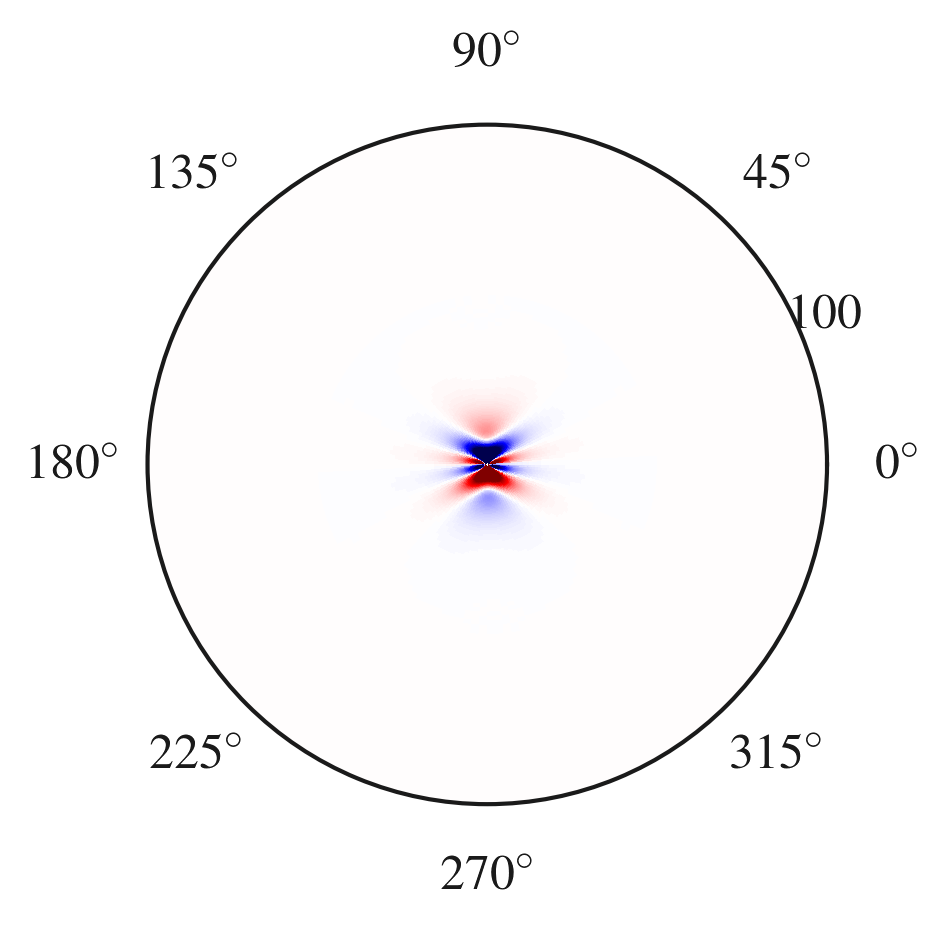

In [200]:
fig = plt.figure(figsize=(10.6,3), dpi=300)
gsp = gridspec.GridSpec(1,1)
ax=plt.subplot(gsp[0,0],projection='polar');
plt.pcolormesh(the[1:],re[1:],data[1:,1:,io.loc(xc,5)],cmap='seismic',vmin=-0.01,vmax=0.01);
plt.show()

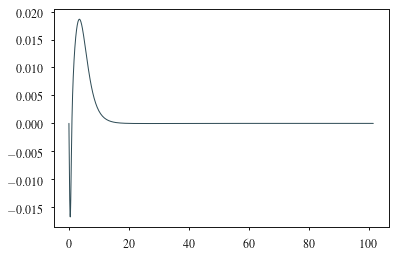

In [201]:
plt.plot(rc,data[:,33,io.loc(xc,10)]);plt.show()

In [94]:
# Plot region of interest 

thmin = 0
thmax = 6.283185
rmin = -1
rmax = 100

zloc = 5
#zk   = -2

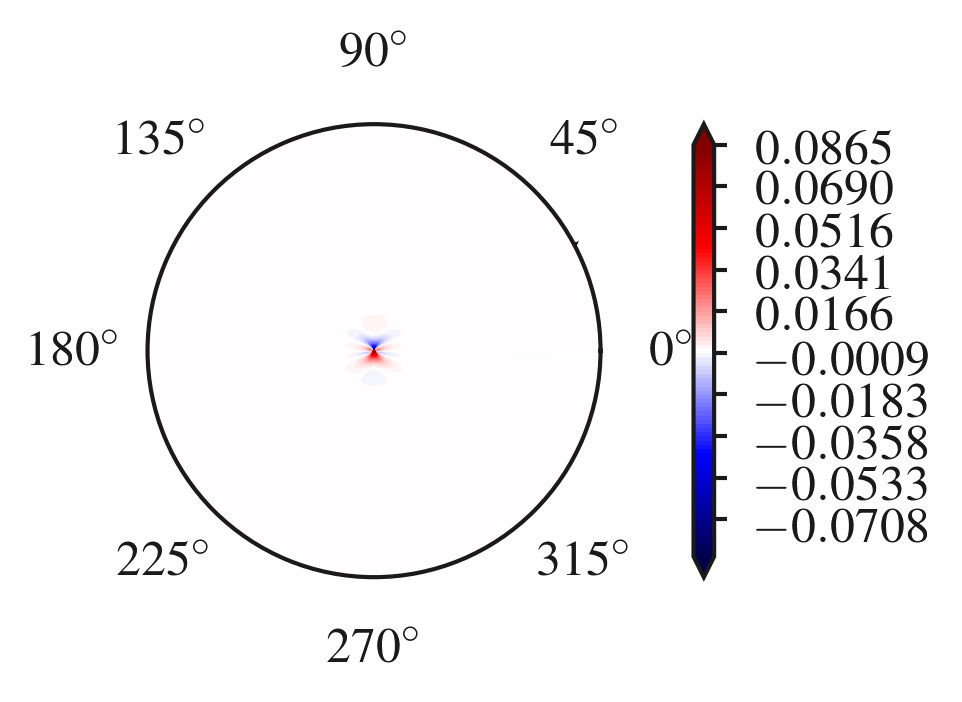

In [216]:
thplot = thc; thplot[0]=0
rplot = rc[1:]
#rplot = re
#rplot=np.append(-rc[1],rplot)
TH,R =np.meshgrid(thplot, rplot)

data_ng = data[1:,:,:]       # remove radial ghost cell
data_ng[:,0,:]=data_ng[:,1,:] #update azymuthal ghost cells
data_ng[:,-1,:]=data_ng[:,-2,:] 

data_slice = data_ng[:,:,io.loc(xc,zloc)]
#data_slice = data_ng[:,:,zk]

df_TH = pd.DataFrame(TH,    index=rplot, columns=thplot)
df_R = pd.DataFrame(R,    index=rplot, columns=thplot)
df_U = pd.DataFrame(data_slice, index=rplot, columns=thplot)

roi = (thmin <= df_TH) & (df_TH <= thmax) & (rmin <= df_R) & (df_R <= rmax)

df_TH_crop = df_TH[roi].dropna(axis=[0,1], how='all')
df_R_crop = df_R[roi].dropna(axis=[0,1], how='all')
df_U_crop = df_U[roi].dropna(axis=[0,1], how='all')

fig = plt.figure(figsize=(8,2), dpi=300)
gsp = gridspec.GridSpec(1,1)
ax=plt.subplot(gsp[0,0],projection='polar')
#fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
lvls = np.linspace(np.min(data_slice),np.max(data_slice),100)
#lvls = np.linspace(-0.01,0.01,40)
plt.contourf(df_TH_crop, df_R_crop, df_U_crop,lvls,cmap='seismic',extend='both')
#plt.pcolormesh(df_TH_crop, df_R_crop, df_U_crop,vmin=np.min(data_slice),vmax=np.max(data_slice),cmap='hot')
#plt.pcolormesh(TH,R,data_slice)
ax.grid(False)
plt.colorbar()
plt.show()

In [228]:
xedges = xc[:]
#xedges[0]=0
rcng=rc[1:];
yedges2 = np.concatenate((-rcng[::-1],rcng),axis=0)
#yedges=yedges[1:-1]
X2,Y2 =np.meshgrid(xedges, yedges2)

In [229]:
data_slice_2 = data_ng[:,io.loc(thc,3.1415/2),:]
data_slice_3 = data_ng[:,io.loc(thc,3*3.1415/2),:]
data_slice_4 =np.concatenate((np.flip(data_slice_3,axis=0),data_slice_2),axis=0)

In [230]:
df_X2 = pd.DataFrame(X2,    index=yedges2, columns=xedges)
df_Y2 = pd.DataFrame(Y2,    index=yedges2, columns=xedges)
df_U2 = pd.DataFrame(data_slice_4, index=yedges2, columns=xedges)

    #df_U.shape

    #df_U.head(3)

    #df_U.tail(3)
xmin = -2.5
xmax = 5
ymin = -100
ymax = 100

roi2 = (-2.5 <= df_X2) & (df_X2 <= 30) & (-100 <= df_Y2) & (df_Y2 <= 100)

df_X2_crop = df_X2[roi2].dropna(axis=[0,1], how='all')
df_Y2_crop = df_Y2[roi2].dropna(axis=[0,1], how='all')
df_U2_crop = df_U2[roi2].dropna(axis=[0,1], how='all')

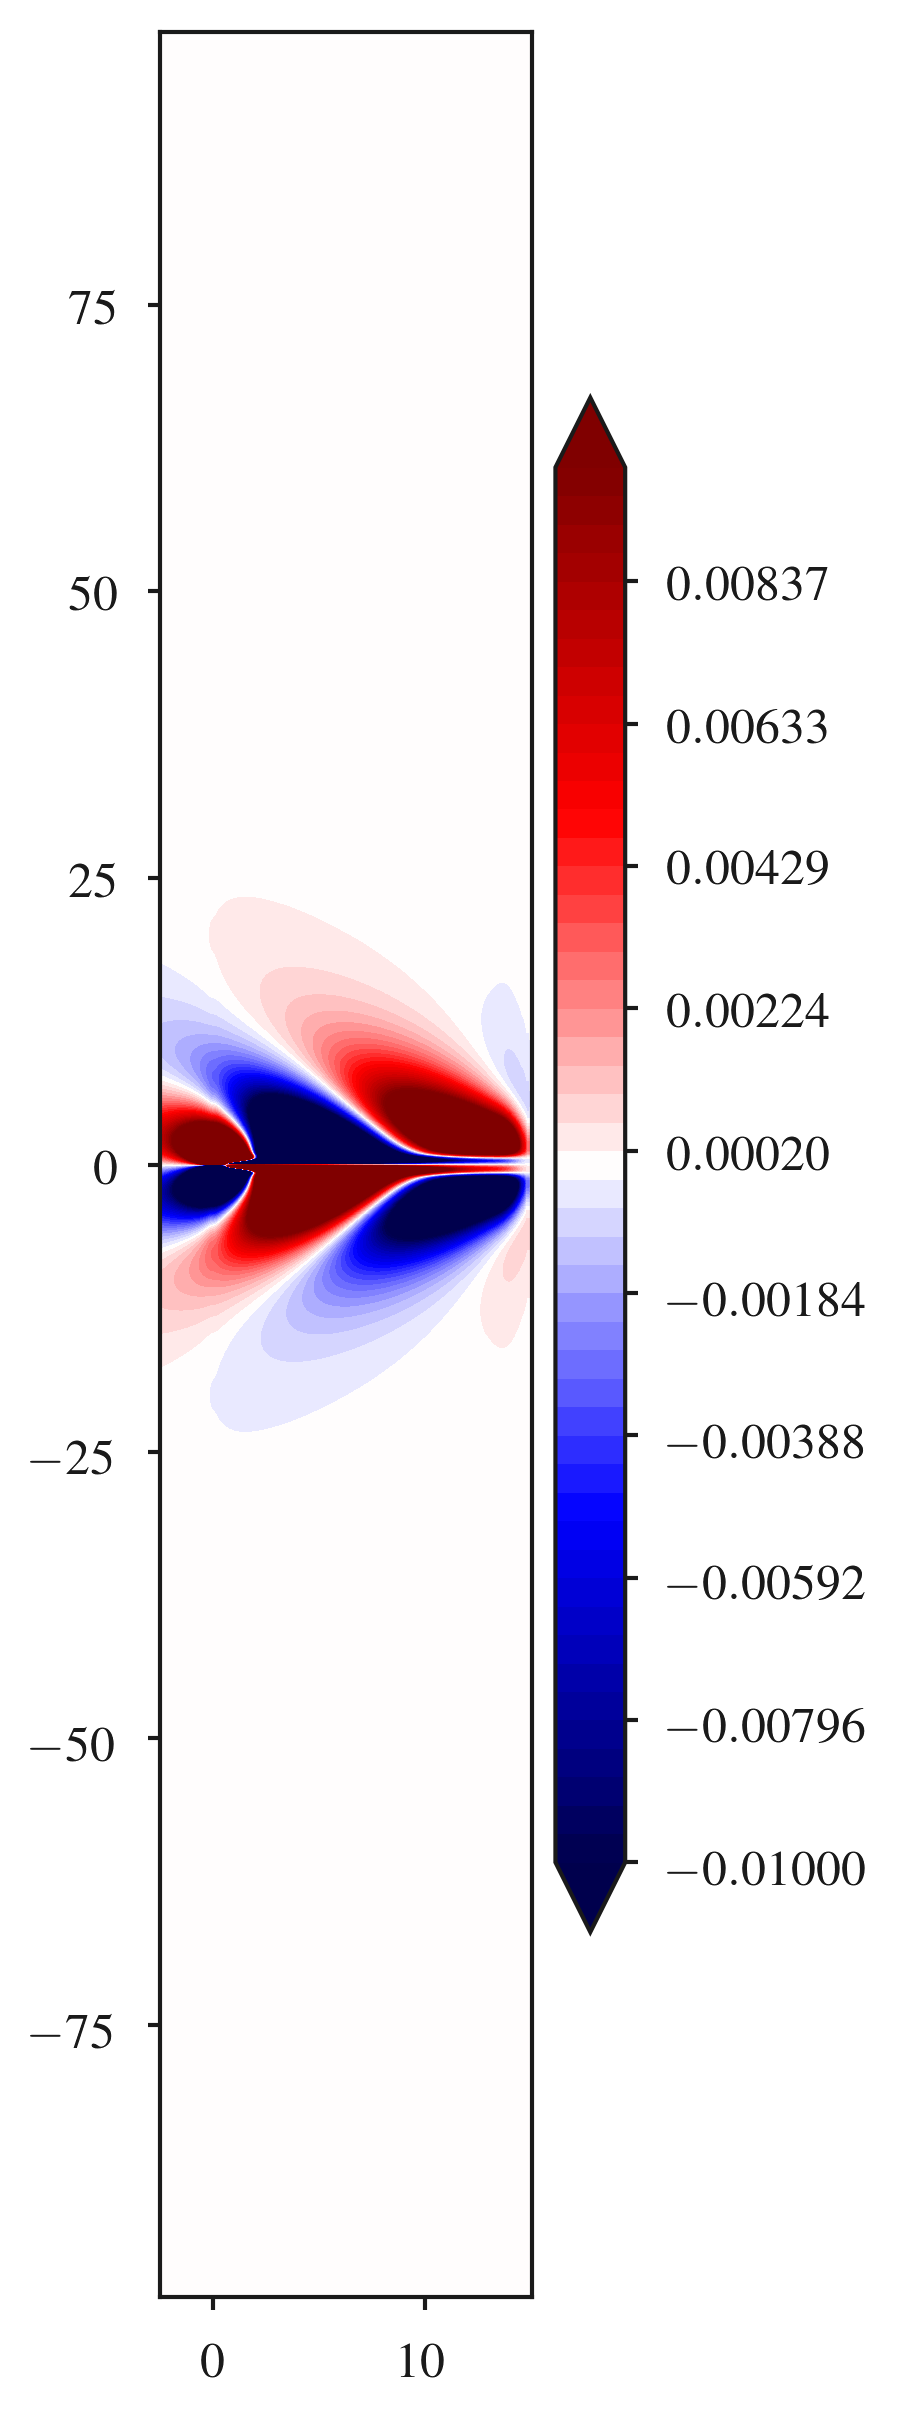

In [231]:
fig2 = plt.figure(figsize=(2,10), dpi=300)
gsp2 = gridspec.GridSpec(1,1)
plt.subplot(gsp[0,0])
lvls = np.linspace(-0.01,0.01,50)

plt.contourf(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls,cmap='seismic',extend='both')#hsv

#plt.pcolormesh(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls)
plt.colorbar()
plt.show()

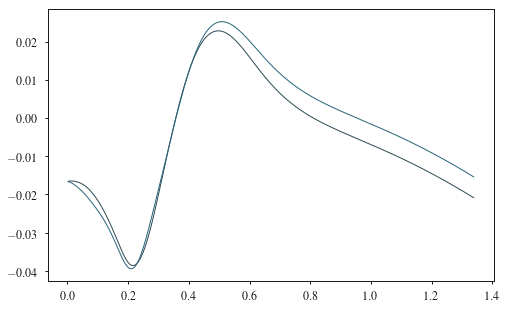

In [29]:
plt.plot(re[:-200],data[:-200,33,io.loc(xc,3)],re[:-200],data[:-200,93,io.loc(xc,3)]);plt.show()

/home/jose/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


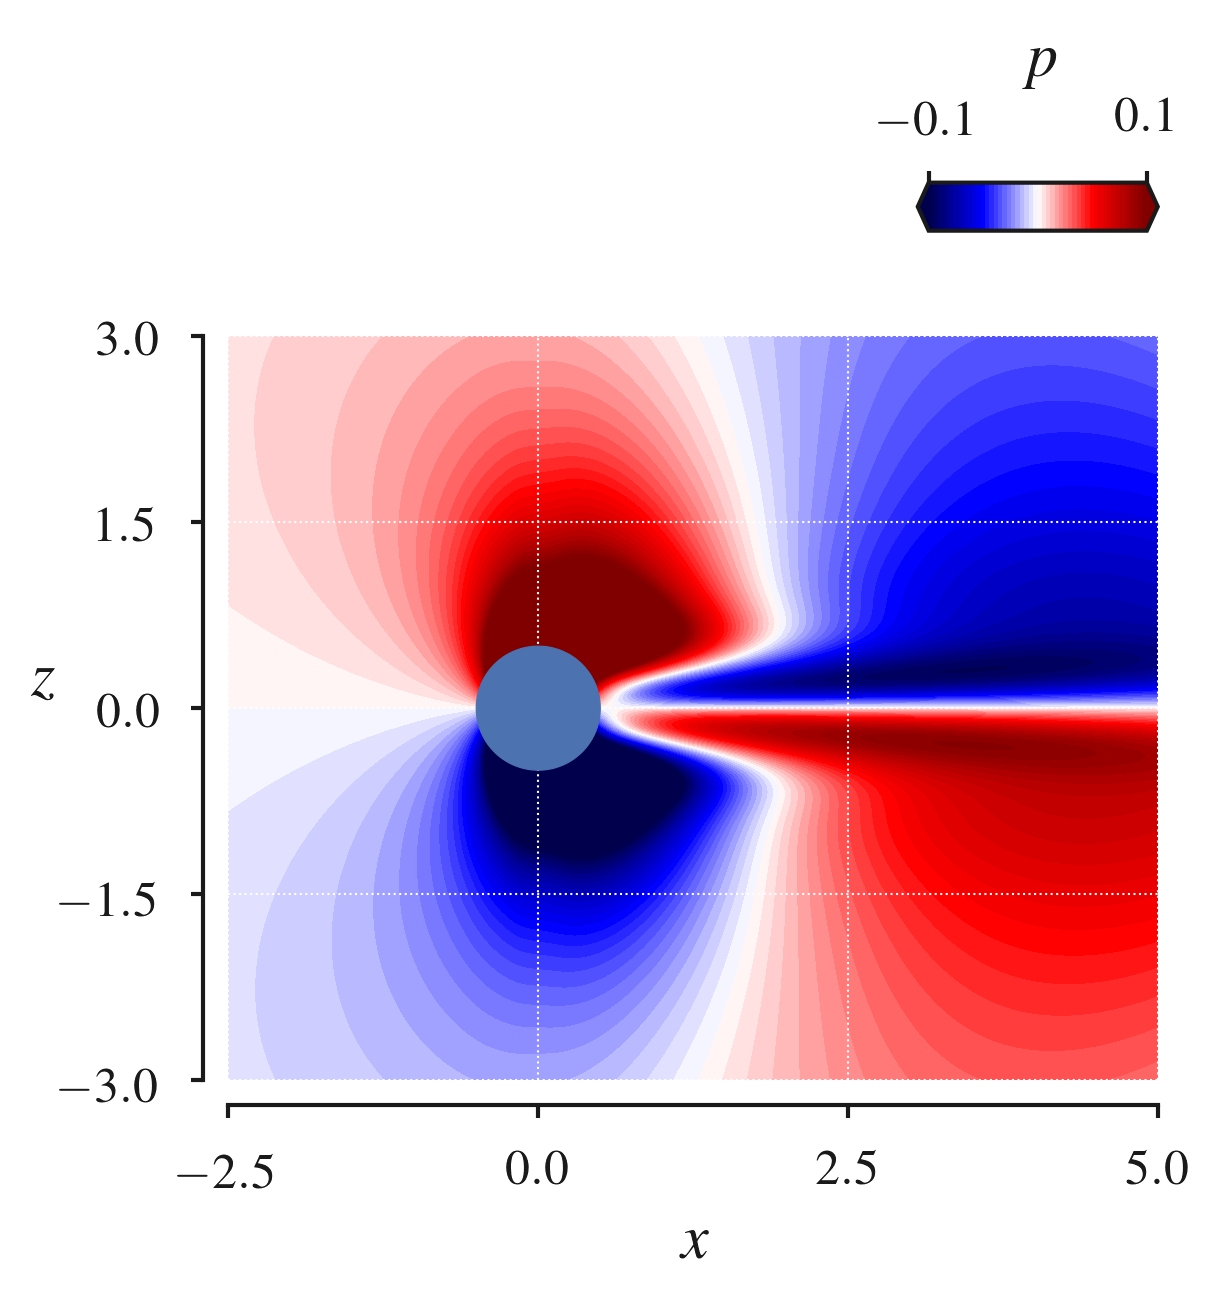

In [57]:
    #fig = plt.figure(figsize=(9.5,2.5), dpi=300)
    fig = plt.figure(figsize=(4,4), dpi=300)

    gsp = gridspec.GridSpec(1,1)

    ax0 = plt.subplot(gsp[0,0])

    #cmap = cmocean.cm.deep_r
    cmap = 'seismic'
    #cmap = cmocean.cm.matter_r
    #cmap = 'inferno'
    
    #lvls = np.linspace(-0.2,1.15,51)
    lvls = np.linspace(-0.1,0.1,51)

    cs0 = ax0.contourf(df_X2_crop, df_Y2_crop, df_U2_crop, levels=lvls, cmap=cmap, extend='both',zorder=0)

    #add extend="both" to the options in contourf

    # Fill the body:
    xs = np.linspace(-0.499,0.499,50)
    xs = 0.5*np.sin(xs*np.pi)
    ys = np.sqrt(0.5**2-(xs)**2)
    ax0.fill_between(xs,-ys, ys, interpolate=True, color='b')

    ax0.set_aspect(1.0)

    sns.despine(ax=ax0, offset=6)

    ax0.set_xlim([xmin, xmax])
    ax0.set_ylim([ymin, ymax])

    #xt = np.linspace(xmin, xmax, 5)
#    xt = np.array([-2.5,0,5])
    #xt = np.array([-2.5,0,5,10])

   # yt = np.array([-ymax, 0, ymax])

    xt = np.array([-2.5,0,2.5,5])
    #xt = np.array([-2.5,0,5,10])

    yt = np.array([-3,-1.5, 0,1.5, ymax])

    plt.grid(True,axis='both',color='white', linestyle=':', linewidth=0.5)

    
    
    ax0.set_xticks(xt)
    ax0.set_yticks(yt)

    ax0.set_xlabel(r'$x$')
    ax0.set_ylabel(r'$z$', rotation=0) #labelpad=12)
#    cbaxes = fig.add_axes([0.8, 0.9, 0.1, 0.04])
    cbaxes = fig.add_axes([0.7, 0.9, 0.2, 0.04])
#    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])
    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.1,0.1])

    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
#    cb.set_label(r"$U$")
    cb.set_label(r"$p$")


    #plt.savefig('/home/jose/Dropbox/aux/draft/figures/sphere_R3.7E3_F05_p_grid.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    #end = time.time()

In [31]:
#diff along the vertical direction
dpdz_crop=df_U2_crop.diff(periods=-1)/df_Y2_crop.diff(periods=-1)

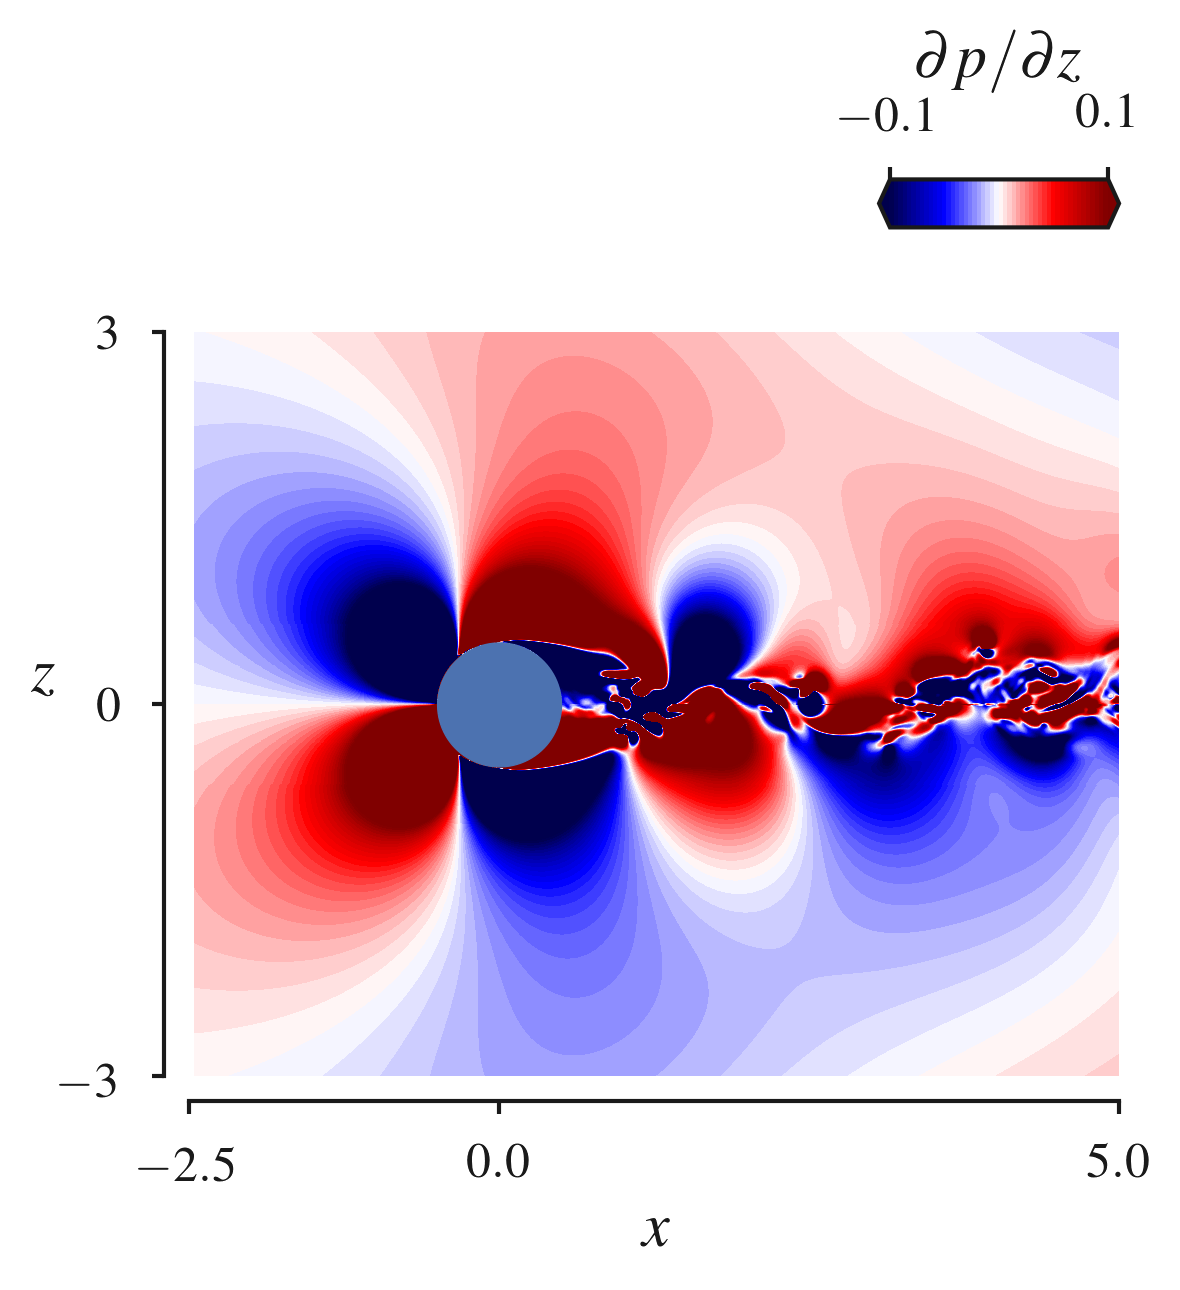

In [32]:
    #fig = plt.figure(figsize=(9.5,2.5), dpi=300)
    fig = plt.figure(figsize=(4,4), dpi=300)

    gsp = gridspec.GridSpec(1,1)

    ax0 = plt.subplot(gsp[0,0])

    #cmap = cmocean.cm.deep_r
    cmap = 'seismic'
    #cmap = cmocean.cm.matter_r
    #cmap = 'inferno'
    
    #lvls = np.linspace(-0.2,1.15,51)
    lvls = np.linspace(-0.1,0.1,51)

    cs0 = ax0.contourf(df_X2_crop, df_Y2_crop, dpdz_crop, levels=lvls, cmap=cmap, extend='both')

    #add extend="both" to the options in contourf

    # Fill the body:
    xs = np.linspace(-0.499,0.499,50)
    xs = 0.5*np.sin(xs*np.pi)
    ys = np.sqrt(0.5**2-(xs)**2)
    ax0.fill_between(xs,-ys, ys, interpolate=True, color='b')

    ax0.set_aspect(1.0)

    sns.despine(ax=ax0, offset=6)

    ax0.set_xlim([xmin, xmax])
    ax0.set_ylim([ymin, ymax])

    #xt = np.linspace(xmin, xmax, 5)
    xt = np.array([-2.5,0,5])
    #xt = np.array([-2.5,0,5,10])

    yt = np.array([-ymax, 0, ymax])

    ax0.set_xticks(xt)
    ax0.set_yticks(yt)

    ax0.set_xlabel(r'$x$')
    ax0.set_ylabel(r'$z$', rotation=0) #labelpad=12)
#    cbaxes = fig.add_axes([0.8, 0.9, 0.1, 0.04])
    cbaxes = fig.add_axes([0.7, 0.9, 0.2, 0.04])
#    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])
    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.1,0.1])

    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
#    cb.set_label(r"$U$")
    cb.set_label(r"$\partial p/\partial z$")


    #plt.savefig('/home/jose/Dropbox/aux/draft/figures/sphere_R3.7E3_F1_dpdz.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    #end = time.time()

In [33]:
#diff along the horizontal direction
dpdx_crop=df_U2_crop.diff(periods=-1,axis=1)/df_X2_crop.diff(periods=-1,axis=1)

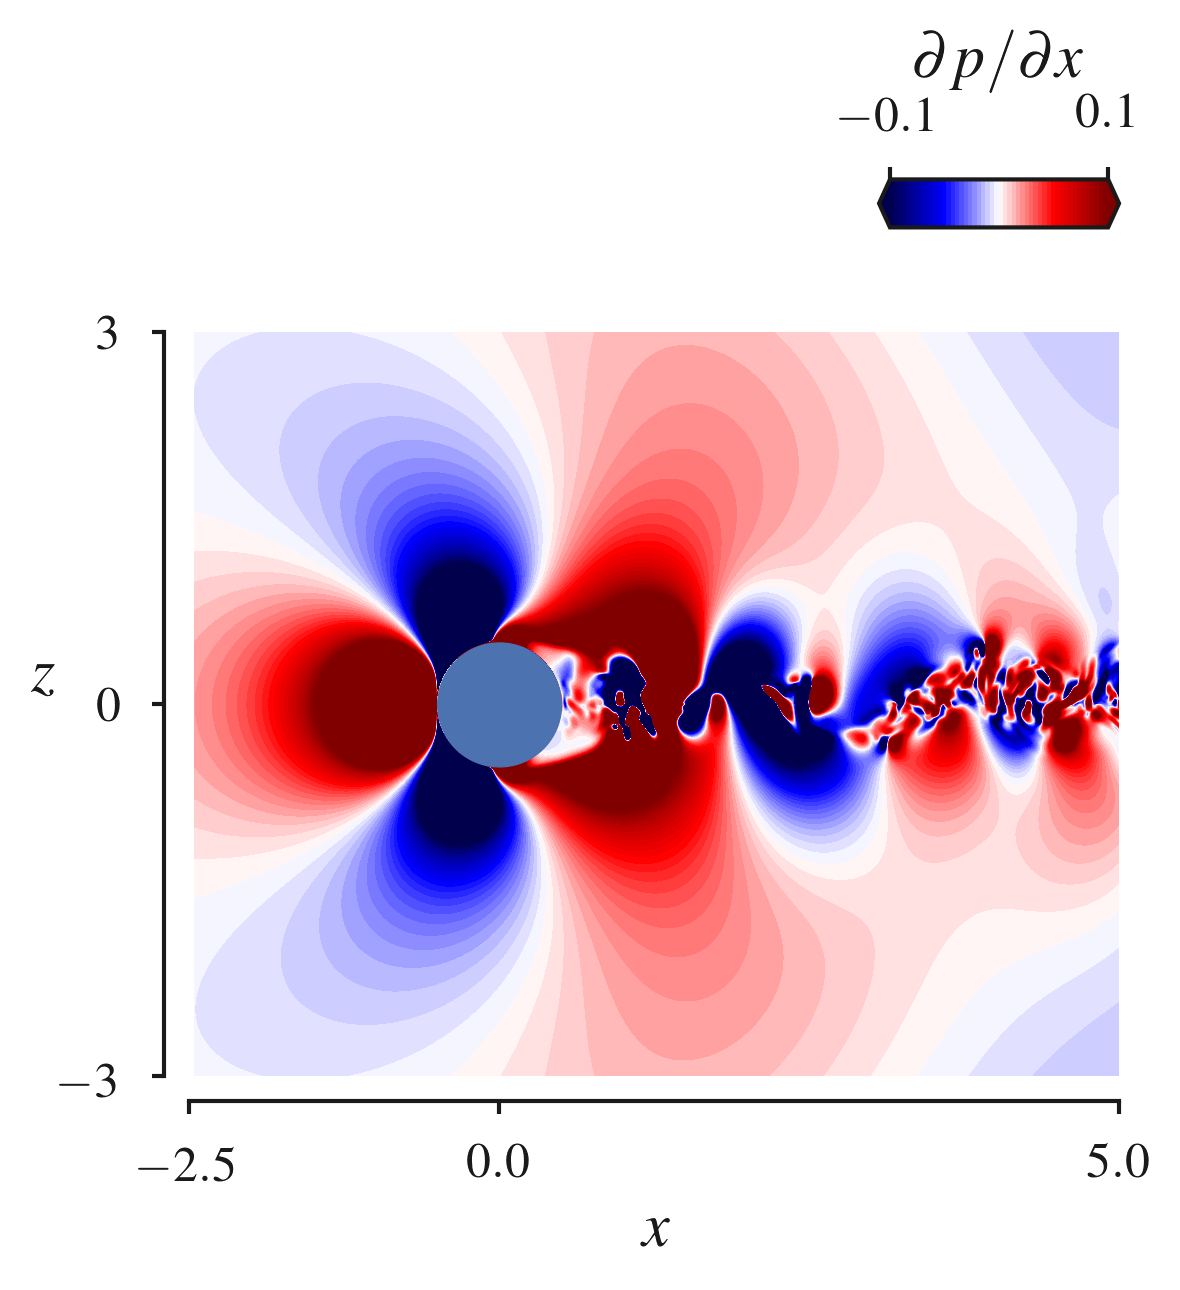

In [34]:
    #fig = plt.figure(figsize=(9.5,2.5), dpi=300)
    fig = plt.figure(figsize=(4,4), dpi=300)

    gsp = gridspec.GridSpec(1,1)

    ax0 = plt.subplot(gsp[0,0])

    #cmap = cmocean.cm.deep_r
    cmap = 'seismic'
    #cmap = cmocean.cm.matter_r
    #cmap = 'inferno'
    
    #lvls = np.linspace(-0.2,1.15,51)
    lvls = np.linspace(-0.1,0.1,51)

    cs0 = ax0.contourf(df_X2_crop, df_Y2_crop, dpdx_crop, levels=lvls, cmap=cmap, extend='both')

    #add extend="both" to the options in contourf

    # Fill the body:
    xs = np.linspace(-0.499,0.499,50)
    xs = 0.5*np.sin(xs*np.pi)
    ys = np.sqrt(0.5**2-(xs)**2)
    ax0.fill_between(xs,-ys, ys, interpolate=True, color='b')

    ax0.set_aspect(1.0)

    sns.despine(ax=ax0, offset=6)

    ax0.set_xlim([xmin, xmax])
    ax0.set_ylim([ymin, ymax])

    #xt = np.linspace(xmin, xmax, 5)
    xt = np.array([-2.5,0,5])
    #xt = np.array([-2.5,0,5,10])

    yt = np.array([-ymax, 0, ymax])

    ax0.set_xticks(xt)
    ax0.set_yticks(yt)

    ax0.set_xlabel(r'$x$')
    ax0.set_ylabel(r'$z$', rotation=0) #labelpad=12)
#    cbaxes = fig.add_axes([0.8, 0.9, 0.1, 0.04])
    cbaxes = fig.add_axes([0.7, 0.9, 0.2, 0.04])
#    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])
    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.1,0.1])

    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
#    cb.set_label(r"$U$")
    cb.set_label(r"$\partial p/\partial x$")


    #plt.savefig('/home/jose/Dropbox/aux/draft/figures/sphere_R3.7E3_F1_dpdx.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    #end = time.time()